In [1]:
#### Import necessary modules and load data set###
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load dataseet
iris = datasets.load_iris()
X_original = iris.data 
scaler = StandardScaler().fit(X_original)
X = scaler.transform(X_original)
y = iris.target

In [2]:
## First try testing a model using holdout method


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(max_iter = 1000) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print the accuracy score
print('accuracy: ', accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.9777777777777777
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [3]:
## Second try testing a model using cross-validation

logreg_cv = LogisticRegression(max_iter = 1000)
scores = cross_val_score(logreg_cv, X, y, cv=5, scoring='accuracy')
predictions = cross_val_predict(logreg_cv, X, y, cv=5)

print(scores)
print('Cross-Validated accuracy: ', scores.mean())

print(accuracy_score(y, predictions))
print('\n')
print('Classification report: ')
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))


[0.96666667 1.         0.93333333 0.9        1.        ]
Cross-Validated accuracy:  0.9600000000000002
0.96


Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


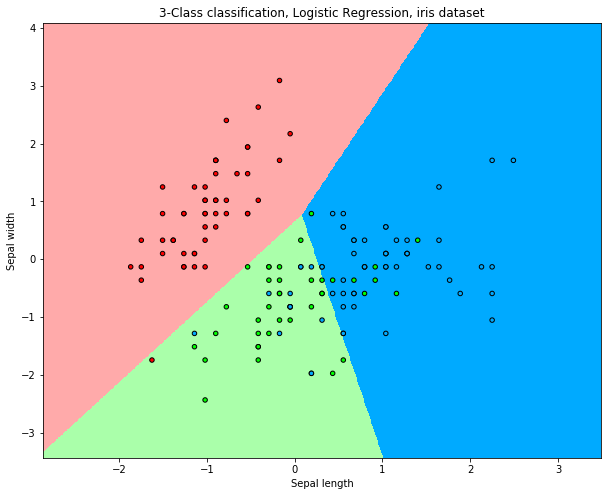

In [8]:
## Plot the decision boundaries for the first two features (can only 2 features at a time in 2D)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# build model and train the model
#logreg = LogisticRegression(max_iter = 1000)
#logreg.fit(X_train, y_train)
h = .01  # step size in the mesh

# calculate min, max and limits (x_min=length, y_min=width)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Note that the two features are retrained in order to get the right dimensions
# build model with only two features to plot
logreg_2d = LogisticRegression(max_iter = 1000) 
logreg_2d.fit(X_train[:, :2], y_train)

# get the predict values
y_pred_2d = logreg_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred_2d = y_pred_2d.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))

plt.pcolormesh(xx, yy, y_pred_2d, cmap=cmap_light)

#Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("3-Class classification, Logistic Regression, iris dataset")
plt.show()